 # Assignment-04-Simple_Linear_Regression2

Q2) Build a prediction model for Salary_hike <br/>
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.<br/>
Dataset: Salary_Data.csv

## Import libraries

In [1]:
import pandas as pd
import numpy as np

## Import Data Set


In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA & Visualization

In [3]:
data.shape # 21 rows and 2 columns

(30, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


The given dataset has 30 rows and 2 columns, and both the columns have 30 non null values which indicated that there are no
null values in the given data set.

### Check for null values in the dataset

In [5]:
data.isnull().sum()  # No null values

YearsExperience    0
Salary             0
dtype: int64

### Rename column name

In [6]:
data = data.rename({'YearsExperience':'YearsExp'}, axis=1)
data.head()

,YearsExp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExp', ylabel='Density'>

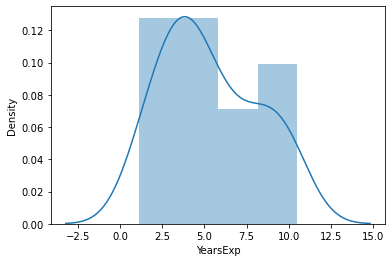

In [7]:
import seaborn as sns
sns.distplot(data['YearsExp'])

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

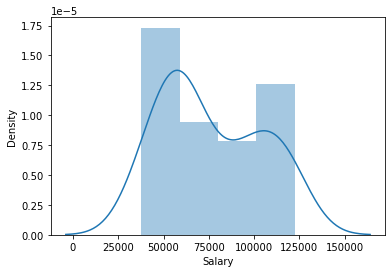

In [8]:
sns.distplot(data['Salary'])

## BoxPlot

In [9]:
data.skew()

YearsExp    0.37956
Salary      0.35412
dtype: float64

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExp'>

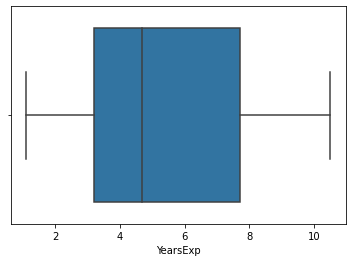

In [10]:
sns.boxplot(data['YearsExp']) #-------------Years Experience---------------------

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

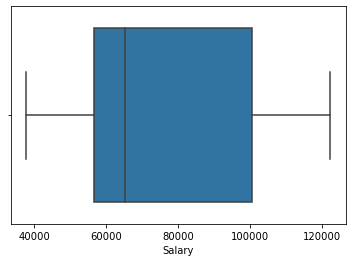

In [11]:
sns.boxplot(data['Salary'])  #-----------------Salary ---------------------------

## Correlation Analysis

In [12]:
data.corr()

,YearsExp,Salary
YearsExp,1.000000,0.978242
Salary,0.978242,1.000000


## Scatterplot

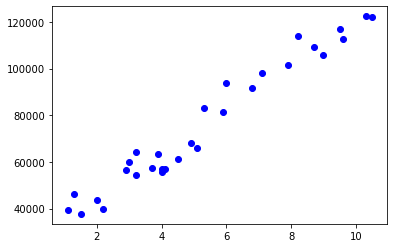

In [13]:
import matplotlib.pyplot as plt
plt.plot(data.YearsExp,data.Salary,"bo") # x=YearsExp y=Salary

### The above scatter plot shows positive and a very Strong Correlation among the two variables

## Building a Linear Regression model


In [14]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExp', data = data).fit() # Salary= Dependent Var  YearsExp= Independent Var

<AxesSubplot:xlabel='YearsExp', ylabel='Salary'>

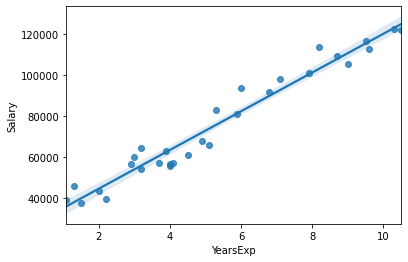

In [15]:
sns.regplot(x="YearsExp", y="Salary", data=data)

## Model Testing

In [16]:
#Finding Coefficient parameters
model.params  #bo =Intercept b1=Sorting Time

Intercept    25792.200199
YearsExp      9449.962321
dtype: float64

In [17]:
# Finding tvalues and pvalues
model.tvalues,model.pvalues
print(model.tvalues, '\n', model.pvalues)

Intercept    11.346940
YearsExp     24.950094
dtype: float64 
 Intercept    5.511950e-12
YearsExp     1.143068e-20
dtype: float64


In [18]:
#R squared values
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

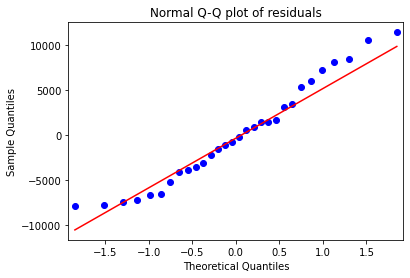

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Introducing Predicted Column in the data set

In [20]:
data['Predicted']= model.fittedvalues
data

,YearsExp,Salary,Predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


### Introducing Error Column in the data set

In [21]:
model.predict(data) # Prediction of points

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [22]:
data['Error']= data['Salary']-data['Predicted']
data

,YearsExp,Salary,Predicted,Error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306
5,2.9,56642.0,53197.090931,3444.909069
6,3.0,60150.0,54142.087163,6007.912837
7,3.2,54445.0,56032.079627,-1587.079627
8,3.2,64445.0,56032.079627,8412.920373
9,3.7,57189.0,60757.060788,-3568.060788


## Manual Model Predictions

In [23]:
# Manual prediction for Salary in row 1 for 1.1 year of experience
sal=(25792.200199)+(9449.962321)*1.1  # y= b0 + b1* x ,b0=Intercept b1= Salary,x= Years Exp (model.param=b0=25792.200199  b1=9449.962321) 
sal

36187.158752100004

# Predict for new data points

In [24]:
# Automatic Prediction for Salary for Experience of 5 and 10 years
newdata=pd.Series([5,10]) #in form of series
newdata   #YearExp=5,10

0     5
1    10
dtype: int64

In [25]:
new_pred=pd.DataFrame(newdata,columns=['YearsExp'])
new_pred

,YearsExp
0,5
1,10


In [26]:
model.predict(new_pred)

0     73042.011806
1    120291.823413
dtype: float64